In [111]:
import grid2op
import numpy as np
import torch
from grid2op.PlotGrid import PlotMatplot

In [112]:
from grid2op.Converter import IdToAct

In [113]:
env = grid2op.make("l2rpn_case14_sandbox")

In [114]:
plot_helper = PlotMatplot(env.observation_space)

In [115]:
env.gen_redispatchable

array([ True,  True, False, False, False,  True])

In [116]:
action_space_class = IdToAct.init_grid(env.action_space)

In [117]:
action_space = action_space_class(env.action_space)
do_nothing = action_space({})

In [118]:
action_space.init_converter()

In [119]:
action_vectors = [act.to_vect() for act in action_space.all_actions]

In [120]:
action_tensor = torch.tensor(action_vectors, requires_grad=False).float()

In [121]:
action_tensor.shape

torch.Size([511, 160])

In [130]:
action_space.size()

511

In [51]:
env.current_obs.rho 

array([0.00391944, 0.00316219, 0.00257543, 0.00346475, 0.00271865,
       0.00128385, 0.00333111, 0.00153266, 0.00090554, 0.00231161,
       0.00016458, 0.00066574, 0.00113379, 0.00027766, 0.00112932,
       0.00248803, 0.00116208, 0.00193592, 0.00224122, 0.00203188],
      dtype=float32)

In [17]:
len(action_space.all_actions)

511

In [29]:
unitary_line_set_vect = action_space.get_all_unitary_line_set(action_space)

In [24]:
print(unitary_line_change_vect[10])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - switch status of 1 powerlines ([0])
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


In [26]:
do_nothing.impact_on_objects()

{'has_impact': False,
 'injection': {'changed': False, 'count': 0, 'impacted': []},
 'force_line': {'changed': False,
  'reconnections': {'count': 0, 'powerlines': []},
  'disconnections': {'count': 0, 'powerlines': []}},
 'switch_line': {'changed': False, 'count': 0, 'powerlines': []},
 'topology': {'changed': False,
  'bus_switch': [],
  'assigned_bus': [],
  'disconnect_bus': []},
 'redispatch': {'changed': False, 'generators': []}}

In [28]:
len(unitary_line_change_vect)

20

In [34]:
print(unitary_line_set_vect[20])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force reconnection of 1 powerlines ([0])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 1 to line (origin) 0 [on substation 0]
	 	 - assign bus 1 to line (extremity) 0 [on substation 1]


In [37]:
print(unitary_line_set_vect[20])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force reconnection of 1 powerlines ([0])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 1 to line (origin) 0 [on substation 0]
	 	 - assign bus 1 to line (extremity) 0 [on substation 1]


In [85]:
print(unitary_line_set_vect[90])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force reconnection of 1 powerlines ([10])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 2 to line (origin) 10 [on substation 8]
	 	 - assign bus 2 to line (extremity) 10 [on substation 9]


In [41]:
action_space.get_all_unitary_topologies_set(action_space)

178

In [43]:
action_space.size()

511

In [52]:
env.current_obs.line_ex_pos_topo_vect

array([ 3, 19,  9, 13, 20, 14, 21, 44, 47, 50, 41, 54, 45, 51, 55, 31, 38,
       27, 34, 33], dtype=int32)

In [53]:
env.current_obs.line_ex_to_sub_pos

array([0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 3, 0, 2],
      dtype=int32)

In [56]:
env.current_obs.connectivity_matrix().shape

(57, 57)

In [58]:
env.current_obs.gen_pos_topo_vect

array([ 7, 11, 28, 29, 35,  2], dtype=int32)

In [59]:
env.current_obs.topo_vect

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [60]:
env.current_obs.line_or_pos_topo_vect

array([ 0,  1,  4,  5,  6, 10, 15, 24, 25, 26, 36, 37, 42, 48, 52, 16, 17,
       22, 32, 39], dtype=int32)

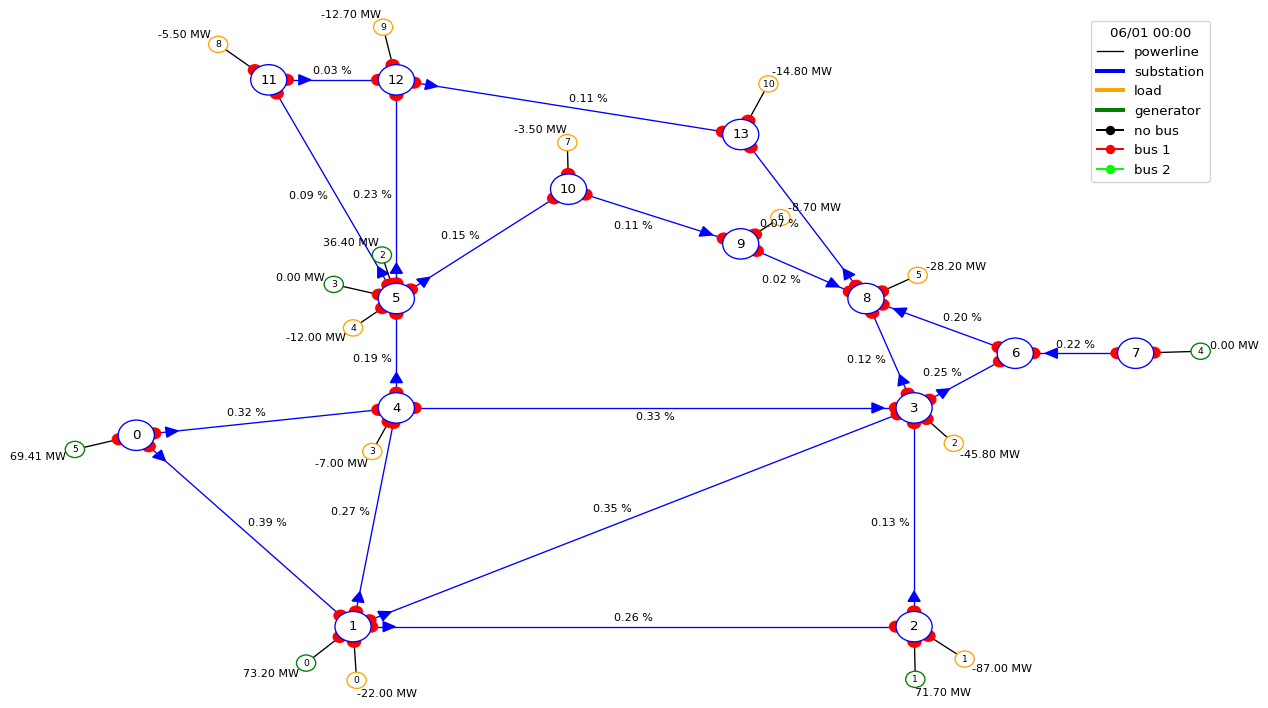

In [86]:
plot_helper.plot_obs(env.current_obs)

In [73]:
env.current_obs.gen_pos_topo_vect

array([ 7, 11, 28, 29, 35,  2], dtype=int32)

In [69]:
env.current_obs.load_pos_topo_vect

array([ 8, 12, 18, 23, 30, 40, 43, 46, 49, 53, 56], dtype=int32)

In [70]:
env.current_obs.line_or_pos_topo_vect

array([ 0,  1,  4,  5,  6, 10, 15, 24, 25, 26, 36, 37, 42, 48, 52, 16, 17,
       22, 32, 39], dtype=int32)

In [71]:
env.current_obs.line_ex_pos_topo_vect

array([ 3, 19,  9, 13, 20, 14, 21, 44, 47, 50, 41, 54, 45, 51, 55, 31, 38,
       27, 34, 33], dtype=int32)

In [78]:
len(env.current_obs.topo_vect)

57

In [81]:
print(action_space.all_actions[0])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


In [91]:
print(action_space.all_actions[50])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - force reconnection of 1 powerlines ([9])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - Set the bus of the following element:
	 	 - assign bus 1 to line (origin) 9 [on substation 5]
	 	 - assign bus 2 to line (extremity) 9 [on substation 12]


In [98]:
action_space.all_actions[510].to_vect()

array([ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,

In [97]:
len(action_space.all_actions)

511

In [138]:
import timeit

starttime = timeit.default_timer()
np.argwhere(np.array(action_space.all_actions) == unitary_line_change_vect[10])
print("The time difference is :", timeit.default_timer() - starttime)

The time difference is : 0.06062058499810519


In [139]:
import timeit

starttime = timeit.default_timer()

for idx, act in enumerate(action_space.all_actions):
    if act == unitary_line_change_vect[10]:
        print(idx)
        break

print("The time difference is :", timeit.default_timer() - starttime)

111
The time difference is : 0.024206763999245595


In [125]:
print(action_space.all_actions[111])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - switch status of 1 powerlines ([10])
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


In [127]:
print(unitary_line_change_vect[10])

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT force any line status
	 - switch status of 1 powerlines ([10])
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration


In [141]:
torch.zeros(env.n_line)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [199]:
act = action_space.all_actions[300]

In [233]:
b = None
for idx, a in enumerate(action_space.all_actions):
    i = a.impact_on_objects()
    if len(i['redispatch']['generators']) > 0:
        b = i
        print(idx)
        break
b

487


{'has_impact': True,
 'injection': {'changed': False, 'count': 0, 'impacted': []},
 'force_line': {'changed': False,
  'reconnections': {'count': 0, 'powerlines': []},
  'disconnections': {'count': 0, 'powerlines': []}},
 'switch_line': {'changed': False, 'count': 0, 'powerlines': []},
 'topology': {'changed': False,
  'bus_switch': [],
  'assigned_bus': [],
  'disconnect_bus': []},
 'redispatch': {'changed': True,
  'generators': [{'gen_id': 0, 'gen_name': 'gen_1_0', 'amount': 1.25}]}}

In [210]:
env.gen_max_ramp_down

array([ 5., 10.,  0.,  0.,  0., 15.], dtype=float32)

In [217]:
levels = np.linspace(-env.gen_max_ramp_down[0], env.gen_max_ramp_up[0], 9)

In [220]:
levels.argwhere()

array([-5.  , -3.75, -2.5 , -1.25,  0.  ,  1.25,  2.5 ,  3.75,  5.  ])

In [203]:
env.gen_pos_topo_vect

{'has_impact': True,
 'injection': {'changed': False, 'count': 0, 'impacted': []},
 'force_line': {'changed': False,
  'reconnections': {'count': 0, 'powerlines': []},
  'disconnections': {'count': 0, 'powerlines': []}},
 'switch_line': {'changed': False, 'count': 0, 'powerlines': []},
 'topology': {'changed': True,
  'bus_switch': [],
  'assigned_bus': [{'bus': 1,
    'object_type': 'line (origin)',
    'object_id': 0,
    'substation': 0},
   {'bus': 1, 'object_type': 'line (origin)', 'object_id': 1, 'substation': 0},
   {'bus': 1, 'object_type': 'generator', 'object_id': 5, 'substation': 0}],
  'disconnect_bus': []},
 'redispatch': {'changed': False, 'generators': []}}

In [200]:
impacts = act.impact_on_objects()
impacts

{'has_impact': True,
 'injection': {'changed': False, 'count': 0, 'impacted': []},
 'force_line': {'changed': False,
  'reconnections': {'count': 0, 'powerlines': []},
  'disconnections': {'count': 0, 'powerlines': []}},
 'switch_line': {'changed': False, 'count': 0, 'powerlines': []},
 'topology': {'changed': True,
  'bus_switch': [{'bus': True,
    'object_type': 'line (origin)',
    'object_id': 1,
    'substation': 0}],
  'assigned_bus': [],
  'disconnect_bus': []},
 'redispatch': {'changed': False, 'generators': []}}

In [144]:
switch_line_tensor = torch.zeros(env.n_line)

In [147]:
switch_line_tensor[impacts['switch_line']['powerlines']] = 1

In [148]:
switch_line_tensor

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.])

In [193]:
act = action_space.all_actions[161]
impacts = act.impact_on_objects()
impacts

{'has_impact': True,
 'injection': {'changed': False, 'count': 0, 'impacted': []},
 'force_line': {'changed': False,
  'reconnections': {'count': 0, 'powerlines': []},
  'disconnections': {'count': 0, 'powerlines': []}},
 'switch_line': {'changed': False, 'count': 0, 'powerlines': []},
 'topology': {'changed': True,
  'bus_switch': [],
  'assigned_bus': [{'bus': 2,
    'object_type': 'line (extremity)',
    'object_id': 3,
    'substation': 3},
   {'bus': 2,
    'object_type': 'line (extremity)',
    'object_id': 5,
    'substation': 3},
   {'bus': 2, 'object_type': 'line (origin)', 'object_id': 6, 'substation': 3},
   {'bus': 1,
    'object_type': 'line (origin)',
    'object_id': 15,
    'substation': 3},
   {'bus': 2,
    'object_type': 'line (origin)',
    'object_id': 16,
    'substation': 3},
   {'bus': 2, 'object_type': 'load', 'object_id': 2, 'substation': 3}],
  'disconnect_bus': []},
 'redispatch': {'changed': False, 'generators': []}}

In [194]:
env.load_pos_topo_vect

array([ 8, 12, 18, 23, 30, 40, 43, 46, 49, 53, 56], dtype=int32)

In [185]:
len(env.line_or_pos_topo_vect)

20

In [188]:
disc_0 = action_space.disconnect_powerline(line_id=0)
env.step(disc_0)

(<grid2op.Space.GridObjects.CompleteObservation_l2rpn_case14_sandbox at 0x7fea267a15c0>,
 760.9949,
 False,
 {'disc_lines': array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False]),
  'is_illegal': False,
  'is_ambiguous': False,
  'is_dispatching_illegal': False,
  'is_illegal_reco': False,
  'opponent_attack_line': None,
  'opponent_attack_sub': None,
  'opponent_attack_duration': 0,
  'exception': [],
  'rewards': {}})

In [189]:
env.current_obs.topo_vect

array([-1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1], dtype=int32)

In [190]:
env.line_or_pos_topo_vect

array([ 0,  1,  4,  5,  6, 10, 15, 24, 25, 26, 36, 37, 42, 48, 52, 16, 17,
       22, 32, 39], dtype=int32)

In [191]:
env.line_ex_pos_topo_vect

array([ 3, 19,  9, 13, 20, 14, 21, 44, 47, 50, 41, 54, 45, 51, 55, 31, 38,
       27, 34, 33], dtype=int32)

In [229]:
def get_topo_pos_vect(env, obj_type):
    pos_vect = env.line_or_pos_topo_vect
    if obj_type == 'line (origin)':
        pos_vect = env.line_or_pos_topo_vect
    elif obj_type == 'line (extremity)':
        pos_vect = env.line_ex_pos_topo_vect
    elif obj_type == 'load':
        pos_vect = env.load_pos_topo_vect
    elif obj_type == 'generator':
        pos_vect = env.gen_pos_topo_vect
    return pos_vect

In [263]:
def get_actions_tensor_2(env, all_actions):
    action_tensors = []
    for act in all_actions:
        impacts = act.impact_on_objects()

        switch_line_tensor = np.zeros(env.n_line)
        switch_line_tensor[impacts['switch_line']['powerlines']] = 1

        force_line_disconnect_vector = np.zeros(env.n_line)
        force_line_disconnect_vector[impacts['force_line']['disconnections']['powerlines']] = 1

        force_line_reconnect_vector = np.zeros(env.n_line)
        force_line_reconnect_vector[impacts['force_line']['reconnections']['powerlines']] = 1

        set_bus_1_vector = np.zeros(env.dim_topo)
        set_bus_2_vector = np.zeros(env.dim_topo)

        for bus_assign in impacts['topology']['assigned_bus']:
            if bus_assign['bus'] == 1:
                bus_vector = set_bus_1_vector
            else:
                bus_vector = set_bus_2_vector

            obj_id = bus_assign['object_id']
            obj_type = bus_assign['object_type']

            pos_vect = get_topo_pos_vect(env, obj_type)

            bus_vector[pos_vect[obj_id]] = 1

        switch_bus_vector = np.zeros(env.dim_topo)

        for bus_switch in impacts['topology']['bus_switch']:
            obj_id = bus_switch['object_id']
            obj_type = bus_switch['object_type']
            pos_vect = get_topo_pos_vect(env, obj_type)
            switch_bus_vector[pos_vect[obj_id]] = 1

        redisp_vector = np.zeros(env.n_gen * 8)
        for redisp in impacts['redispatch']['generators']:
            obj_id = redisp['gen_id']
            dispatch_levels = np.linspace(-env.gen_max_ramp_down[obj_id], env.gen_max_ramp_up[obj_id], 9)
            level = np.argwhere(dispatch_levels == redisp['amount'])
            if level > 4:
                level = level - 1
            redisp_vector[obj_id * 8 + level] = 1

        action_tensors.append(np.concatenate(
            [switch_line_tensor, force_line_reconnect_vector, force_line_disconnect_vector, set_bus_1_vector,
             set_bus_2_vector, switch_bus_vector, redisp_vector]))
    return action_tensors

In [264]:
actions_tensor = get_actions_tensor_2(env, action_space.all_actions)

In [245]:
np.argwhere(actions_tensor[510] == 1)

array([[274]])

In [244]:
len(actions_tensor)

511

In [239]:
279 - 232

47

In [269]:
actions_tensor[200]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [270]:
action_space.all_actions[200].impact_on_objects()

{'has_impact': True,
 'injection': {'changed': False, 'count': 0, 'impacted': []},
 'force_line': {'changed': False,
  'reconnections': {'count': 0, 'powerlines': []},
  'disconnections': {'count': 0, 'powerlines': []}},
 'switch_line': {'changed': False, 'count': 0, 'powerlines': []},
 'topology': {'changed': True,
  'bus_switch': [],
  'assigned_bus': [{'bus': 2,
    'object_type': 'line (extremity)',
    'object_id': 1,
    'substation': 4},
   {'bus': 1,
    'object_type': 'line (extremity)',
    'object_id': 4,
    'substation': 4},
   {'bus': 1,
    'object_type': 'line (extremity)',
    'object_id': 6,
    'substation': 4},
   {'bus': 2,
    'object_type': 'line (origin)',
    'object_id': 17,
    'substation': 4},
   {'bus': 2, 'object_type': 'load', 'object_id': 3, 'substation': 4}],
  'disconnect_bus': []},
 'redispatch': {'changed': False, 'generators': []}}

In [252]:
np.linspace(-env.gen_max_ramp_down[5], env.gen_max_ramp_up[5], 9)

array([-15.  , -11.25,  -7.5 ,  -3.75,   0.  ,   3.75,   7.5 ,  11.25,
        15.  ])

In [272]:
env.line_ex_pos_topo_vect[6]

21